
Kernel Boyutu: 3x3
NumPy süresi: 9.2784 saniye
OpenCV süresi: 0.0030 saniye


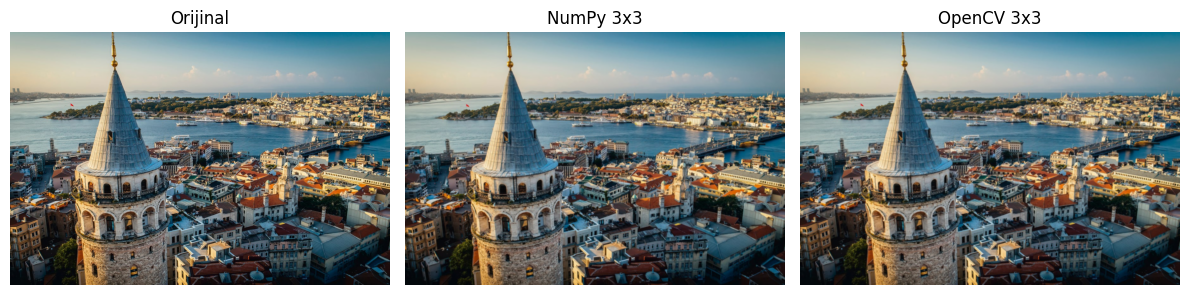


Kernel Boyutu: 11x11
NumPy süresi: 9.4984 saniye
OpenCV süresi: 0.0020 saniye


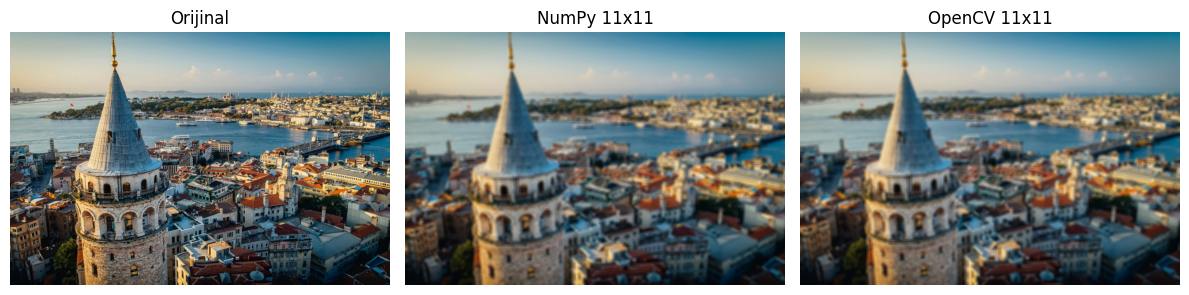

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import time

img= cv2.imread('resim.jpg')
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def box_blur_numpy(image, kernel_size):
    pad = kernel_size 
    h, w, c = image.shape
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='edge')
    output = np.zeros_like(image)

    for y in range(h):
        for x in range(w):
            for ch in range(c):
                region = padded[y:y+kernel_size, x:x+kernel_size, ch]
                output[y, x, ch] = np.mean(region)

    return output.astype(np.uint8)

### burası opencv ile yaptığımız kısım limdi karşılaştırma yapacağız
def box_blur_opencv(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))


kernel_sizes = [3, 11]

for k in kernel_sizes:
    print(f"\nKernel Boyutu: {k}x{k}")

    start = time.time()
    result_numpy = box_blur_numpy(img_rgb, k)
    print(f"NumPy süresi: {time.time() - start:.4f} saniye")

    start = time.time()
    result_cv = box_blur_opencv(img_rgb, k)
    print(f"OpenCV süresi: {time.time() - start:.4f} saniye")

    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Orijinal")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(result_numpy)
    plt.title(f"NumPy {k}x{k}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result_cv)
    plt.title(f"OpenCV {k}x{k}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

